In [1]:
from datetime import datetime
import tensorboard
import tensorflow as tf
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.layers import Input, Dense,BatchNormalization,Activation, GaussianDropout,SeparableConv2D, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16, ResNet50, VGG19, Xception
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt
import cv2


In [2]:
img_size=(128,128)
channels=3

In [3]:
# resizing and converting to RGB
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, img_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
!pip install -q pyyaml h5py

In [5]:
dogml=tf.keras.models.load_model('dogml_custom_model.h5')

In [6]:
dogml.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 128, 128, 256)     1051      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 256)     1024      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 256)     0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              263168    
_________________________________________________________________
gaussian_dropout (GaussianDr (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

In [9]:
cageX = load_and_preprocess_image('cage.jpg')

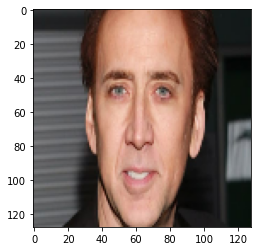

In [10]:
plt.imshow(cageX)

In [13]:
cageX.reshape(1,*img_size,channels)

array([[[[ 60,  58,  61],
         [ 58,  59,  61],
         [ 59,  58,  61],
         ...,
         [ 19,  25,  25],
         [ 19,  25,  25],
         [ 19,  25,  25]],

        [[ 53,  52,  54],
         [ 50,  53,  54],
         [ 52,  53,  54],
         ...,
         [ 19,  25,  25],
         [ 19,  25,  25],
         [ 19,  25,  25]],

        [[ 47,  47,  49],
         [ 44,  48,  49],
         [ 46,  47,  49],
         ...,
         [ 19,  25,  25],
         [ 19,  25,  25],
         [ 19,  25,  25]],

        ...,

        [[100, 101, 103],
         [100, 101, 103],
         [ 99, 100, 102],
         ...,
         [  7,  16,  10],
         [  7,  17,   9],
         [  6,  16,   8]],

        [[ 90,  91,  94],
         [ 90,  91,  94],
         [ 89,  90,  91],
         ...,
         [  7,  16,  10],
         [  7,  17,   9],
         [  6,  16,   8]],

        [[ 94,  95,  97],
         [ 94,  95,  97],
         [ 95,  96,  98],
         ...,
         [  7,  16,  10],
        

In [14]:
pred = dogml.predict(cageX.reshape(1,*img_size,channels))

array([[1.10818595e-01, 4.22839512e-04, 2.05732167e-01, 3.77963157e-03,
        2.11451791e-07, 8.23477458e-05, 1.13184470e-07, 1.51942939e-01,
        5.26939631e-01, 1.11245843e-12, 1.81261021e-06, 2.12137948e-05,
        1.72797270e-04, 1.14801324e-07, 8.49277130e-05, 6.06715957e-07,
        4.03942311e-20, 9.79472641e-20, 1.16423179e-18, 1.12812314e-19]],
      dtype=float32)

In [18]:
labels = ['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound']

In [19]:
labels[list(pred[0]).index(max(pred[0

SyntaxError: unexpected EOF while parsing (<ipython-input-19-1e9fe416658e>, line 1)